In [1]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# 1 Use library scripts to generate p-ER random graphs and r-regular random graph. Let K denote the number of nodes.

##  1.1p-ER random graphs(K=10)

In [2]:
K=10

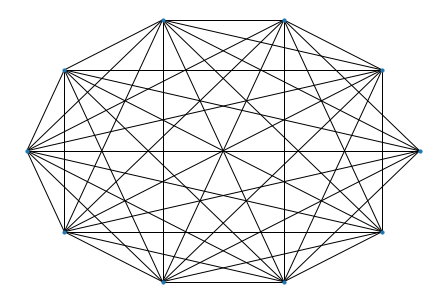

In [3]:
er=nx.erdos_renyi_graph(K,0.8)
ps=nx.shell_layout(er)
nx.draw(er,ps,with_labels=False,node_size=10)
plt.show()

##  1.2  r-regular random graph(K=10)

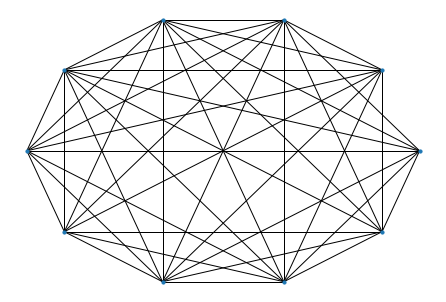

In [4]:
re=nx.random_regular_graph(3, K, seed=None)
ps=nx.shell_layout(re)
nx.draw(er,ps,with_labels=False,node_size=10)
plt.show()

# 2 Write a script to check the connectivity of a given graph.

Criteria to check graph connectivity for undirected graphs.  
Starting from an arbitrary node, all graph nodes can be visited (BSF algorithm).  
The adjacency matrix A is irreducible.  
The second smallest eigenvalue of the graph Laplacian matrix L is positive.  

##  2.1 algebraic method 1 (irreducibility)

In [5]:
A=nx.to_numpy_matrix(er)

In [6]:
I = np.ones((K,K))

In [7]:
E = np.empty((K,K))

In [8]:
E = I
for i in range(0,K):
    E = E + np.linalg.matrix_power(A, i)
if E.all()>0:
    print('The adjacency matrix A is irreducible.')

The adjacency matrix A is irreducible.


In [9]:
def irreducibility(graph):
    A=nx.to_numpy_matrix(er)    
    I = np.ones((K,K))
    E = np.empty((K,K))
    E = I
    for i in range(0,K):
        E = E + np.linalg.matrix_power(A, i)
    if E.all()>0:
        return('The adjacency matrix A is irreducible.')

##  2.2 algebraic method 2 (eigenvalue of the Laplacian matrix)
 An undirected graph is connected if and only if the smallest eigenvalue of the graph Laplacian is simple, i.e., the second smallest eigenvalue of the Laplacian is positive.

In [10]:
L=nx.laplacian_matrix(er)
l=L.todense()

In [11]:
eigenvalue,featurevector=np.linalg.eig(l)

In [12]:
eigenvalue

array([ 0.,  7.,  8.,  9., 10., 10., 10., 10., 10., 10.])

In [13]:
sorted_indices = np.sort(eigenvalue)

In [14]:
if sorted_indices[-2]>0:
    print( 'The graph is connected.')

The graph is connected.


In [15]:
def laplacian(graph):
    L= nx.laplacian_matrix(er,nodelist=range(len(er.nodes)))
    l= L.todense()
    eigenvalue = np.linalg.eig(l)[0]
    second_eigenvalue = np.sort(eigenvalue)[1]
    if second_eigenvalue  > 0:
        return( 'The graph is connected.')

##  2.3 breadth-first search algorithm

In [16]:
import collections

# BFS algorithm
def bfs(graph, root):

    visited, queue = set(), collections.deque([root])
    visited.add(root)
    i=0
    while queue:

        # Dequeue a vertex from queue
        vertex = queue.popleft()
        #print(str(vertex) + " ", end="")
        i+=1
        # If not visited, mark it as visited, and
        # enqueue it
        for neighbour in graph[vertex]:
            if neighbour not in visited:
                visited.add(neighbour)
                queue.append(neighbour)
    if i== nx.number_of_nodes(graph):
         return('Starting from an arbitrary node, all graph nodes can be visited')
        


In [17]:
bfs(er, 2)

'Starting from an arbitrary node, all graph nodes can be visited'

# 3 Compare the complexity as a function of K of the methods above by plotting curves of a complexity measure vs K.

In [45]:
import timeit

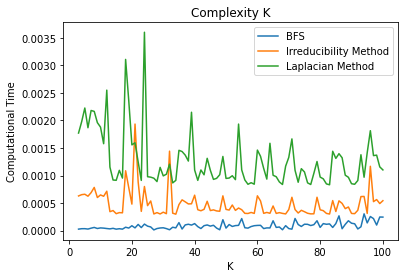

In [48]:
k_seq = list(range(3,101))
timing_bfs = []
timing_irreducible = []
timing_laplacian = []
for k in k_seq:
    g = nx.random_regular_graph(2,k)
   
    start = timeit.default_timer()
    a = bfs(g,0)
    stop = timeit.default_timer()
    timing_bfs.append(stop - start)


    start = timeit.default_timer()
    a = irreducibility(g)
    stop = timeit.default_timer()
    timing_irreducible.append(stop - start)

    start = timeit.default_timer()
    a = laplacian(g)
    stop = timeit.default_timer()
    timing_laplacian.append(stop - start)

plt.plot(k_seq,timing_bfs,label = "BFS")
plt.plot(k_seq,timing_irreducible,label = "Irreducibility Method")
plt.plot(k_seq,timing_laplacian,label = "Laplacian Method")
plt.legend()
plt.title("Complexity K")
plt.xlabel("K")
plt.ylabel("Computational Time")

plt.show()

# 4 Let p c (G) denote the probability that a graph G is connected. By running Monte Carlo simulations, estimate p c (G) and produce two curve plots:

##  4.1 p c (G) vs. p for Erd˝ os-R´ enyi graphs with K = 100.

In [49]:
def monte_carlo(nodes,p):
    counter=0
    for i in range(nodes): 
        er = nx.erdos_renyi_graph(nodes,p,directed=False)

        L= nx.laplacian_matrix(er,nodelist=range(len(er.nodes)))
        l= L.todense()
        eigenvalue = np.linalg.eig(l)[0]
        second_eigenvalue = np.sort(eigenvalue)[1]
        if second_eigenvalue  > 0:
            counter+=1

        else:
            pass
    return counter/nodes

In [51]:
perdos = []
probabilities=[0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15]
for i in range(len(probabilities)):
    perdos.append(monte_carlo(100,probabilities[i]))

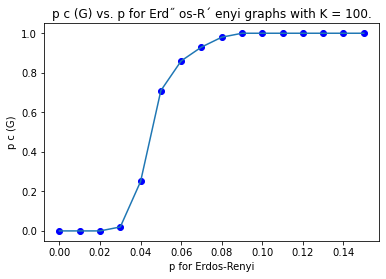

In [52]:
plt.plot(probabilities, perdos,'bo',probabilities, perdos)
plt.xlabel('p for Erdos-Renyi')
plt.ylabel('p c (G)')
plt.title('p c (G) vs. p for Erd˝ os-R´ enyi graphs with K = 100.')
plt.show()

## 4.2 p c (G) vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.


In [23]:
def monte_carlo_regular(r,nodes):
    counter=0
    for i in range(nodes): 
        re=nx.random_regular_graph(r,nodes)
        L= nx.laplacian_matrix(re,nodelist=range(len(re.nodes)))
        l= L.todense()
        eigenvalue = np.linalg.eig(l)[0]
        second_eigenvalue = np.sort(eigenvalue)[1]
        if second_eigenvalue  > 0:
            counter+=1

        else:
            pass
    return counter/nodes

In [24]:
pregular2=[]
pregular8=[]
v2=[]
v8=[]
rvector=[2,8]
for j in range(3,100):
    v2.append(j)
    pregular2.append(monte_carlo_regular(rvector[0],100))
for i in range(9,100):
    v8.append(i)
    pregular8.append(monte_carlo_regular(rvector[1],100))

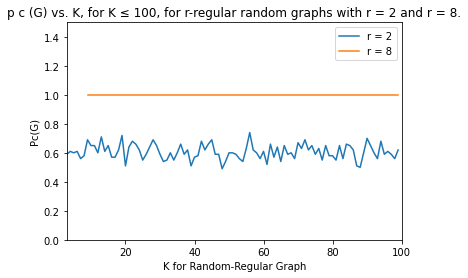

In [42]:
plt.plot(v2, pregular2, label = "r = 2")
plt.plot(v8,pregular8,label = "r = 8")
plt.axis([3, 100, 0.0, 1.5])
plt.title('p c (G) vs. K, for K ≤ 100, for r-regular random graphs with r = 2 and r = 8.')
plt.legend()
plt.xlabel('K for Random-Regular Graph')
plt.ylabel('Pc(G)')
plt.show()